Smoothing and Sharpening

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def plot_image(image):
    plt.figure(figsize=(7,7))
    plt.imshow(image)

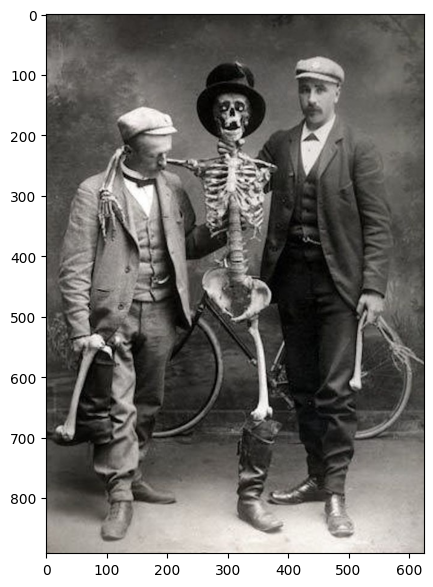

In [51]:
image = cv2.imread("gb.jpg")
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plot_image(image)


In [28]:
kernel=np.ones((10,10))/100
kernel

array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]])

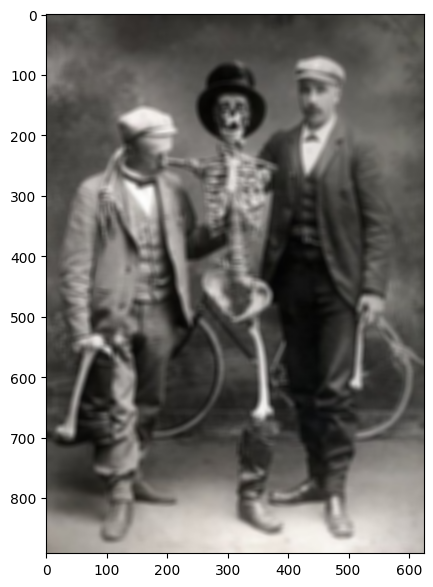

In [29]:
new=cv2.filter2D(image,-1,kernel)
plot_image(new)

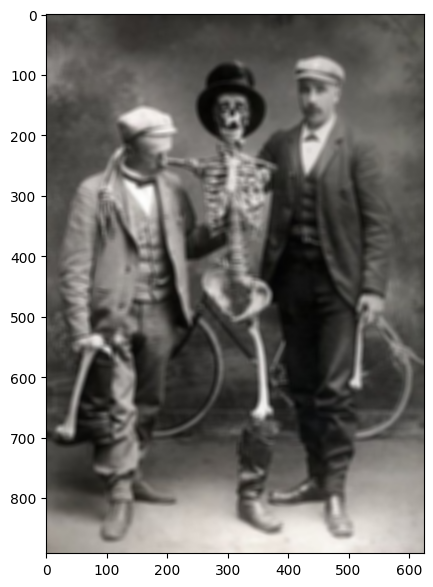

In [30]:
blur=cv2.blur(image,ksize=(9,9))
plot_image(blur)

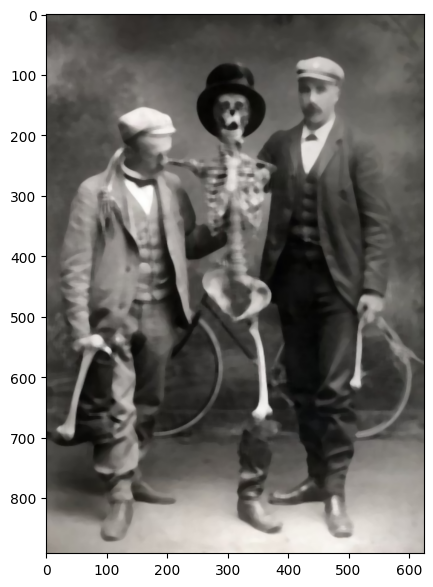

In [31]:
blur=cv2.medianBlur(image,9)
plot_image(blur)

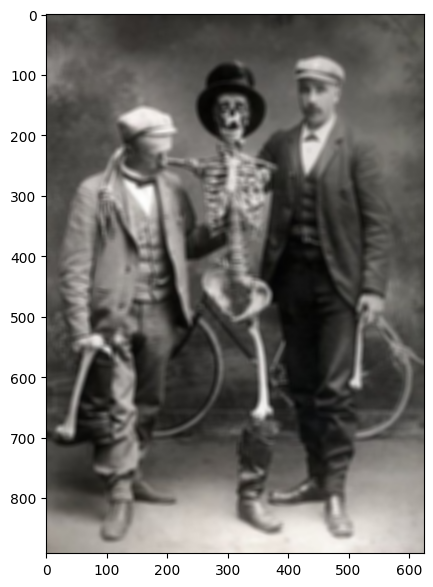

In [32]:
blur=cv2.GaussianBlur(image,(9,9),15)
plot_image(blur)

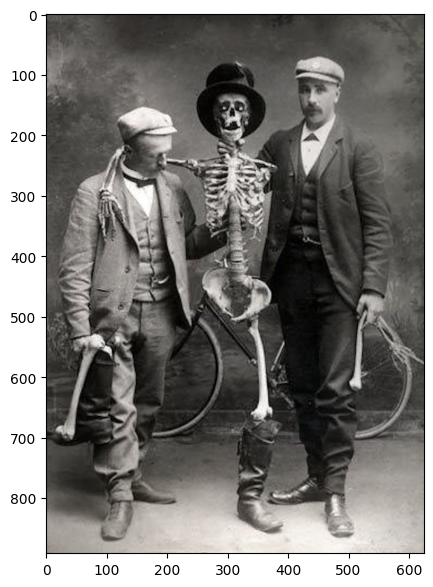

In [52]:
blur=cv2.bilateralFilter(image,5,6,6)
plot_image(blur)

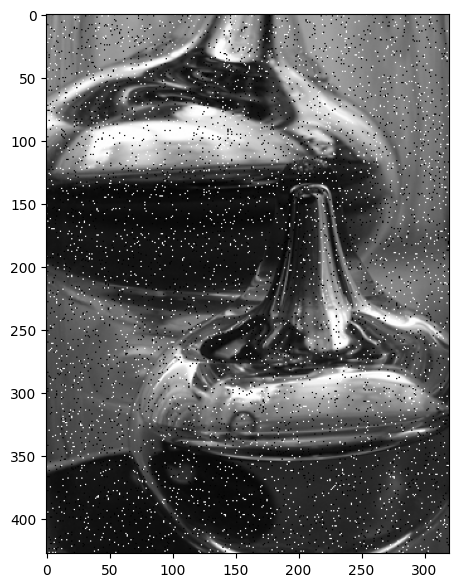

In [58]:
image = cv2.imread("sp.png")
plot_image(image)

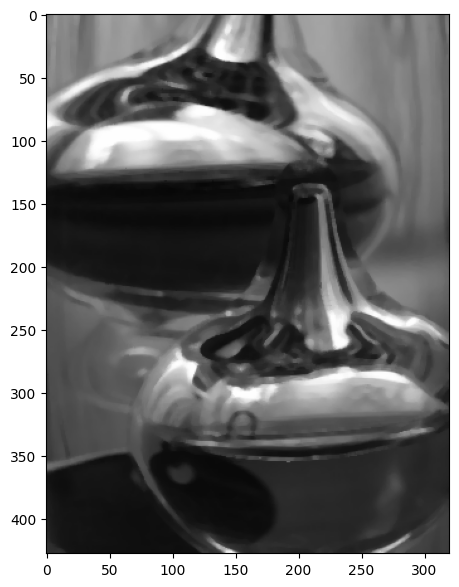

In [61]:
blur=cv2.medianBlur(image,5)
plot_image(blur)

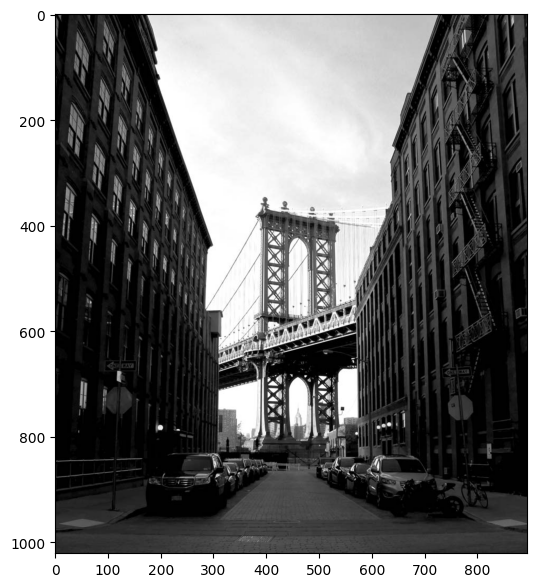

In [82]:
image = cv2.imread("ed3.jpg")
plot_image(image)
blur=cv2.medianBlur(image,5)

In [83]:
print("Image shape:", image.shape)
print("Blur shape:", blur.shape)


Image shape: (1021, 894, 3)
Blur shape: (1021, 894, 3)


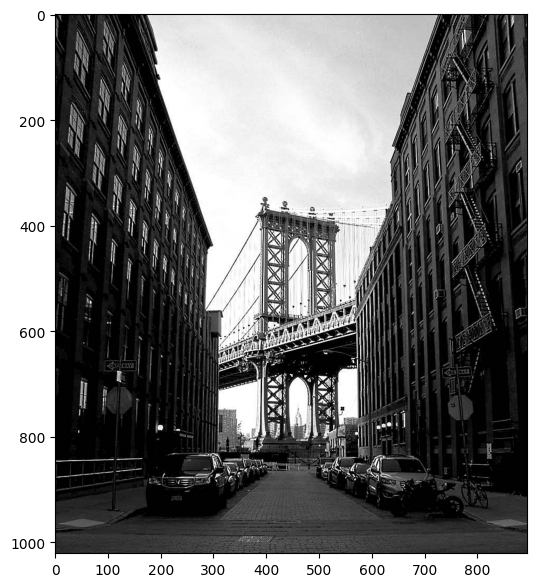

In [84]:
sharp=cv2.addWeighted(image,2.5,blur,-1.5,0)
plot_image(sharp)


Histogram equalization

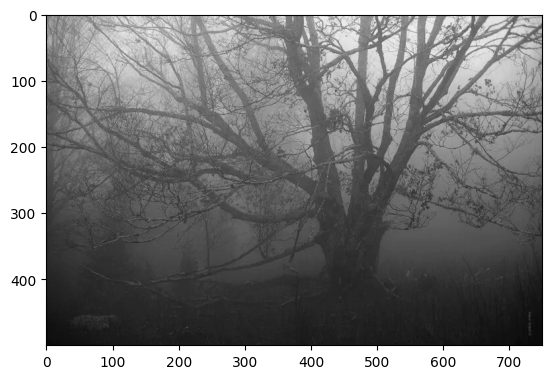

In [35]:
import matplotlib.pyplot as plt
image =cv2.imread('he.webp')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')


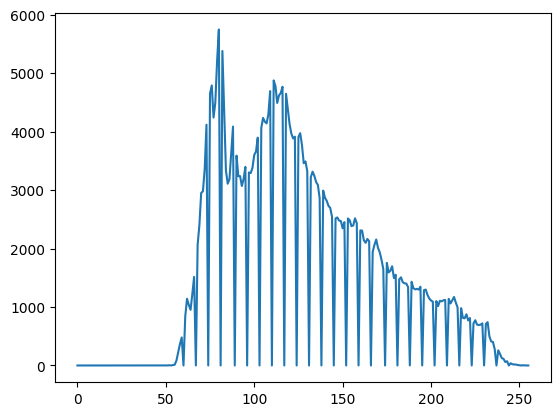

In [36]:
hist = cv2.calcHist([image],[0],None,[256],[0,255])
plt.plot(hist)
plt.show()

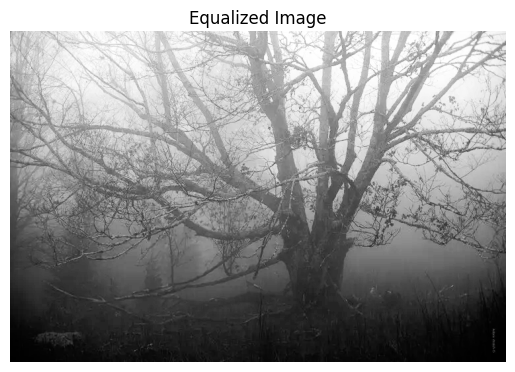

In [37]:
gray_image = gray_image.astype('uint8')
image_hist = cv2.equalizeHist(gray_image)
plt.imshow(image_hist, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()

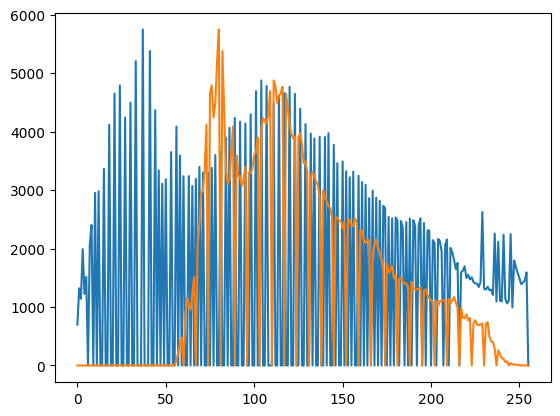

In [38]:
hist2=cv2.calcHist([image_hist],[0],None,[256],[0,255])
hist = cv2.calcHist([image],[0],None,[256],[0,255])
plt.plot(hist2)
plt.plot(hist)
plt.show()

(-0.5, 749.5, 499.5, -0.5)

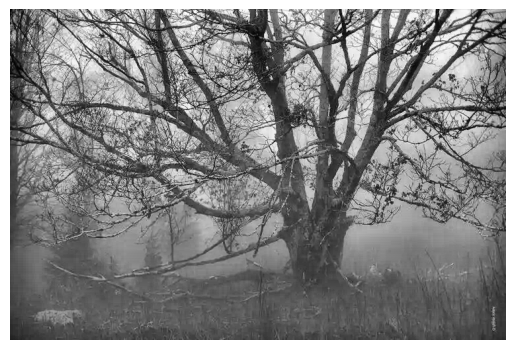

In [39]:
clahe=cv2.createCLAHE(clipLimit=5)
final_img=clahe.apply(gray_image)
plt.imshow(final_img, cmap='gray')
plt.axis('off')

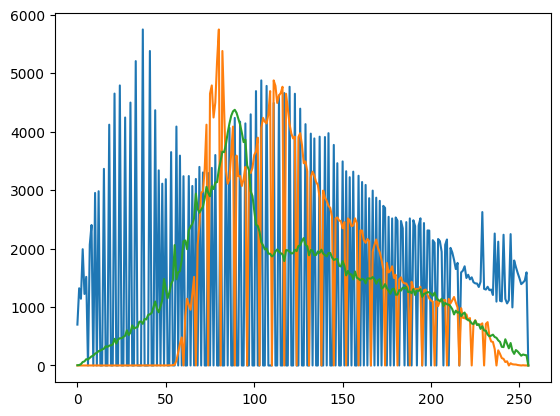

In [40]:
hist2=cv2.calcHist([image_hist],[0],None,[256],[0,255])
hist = cv2.calcHist([image],[0],None,[256],[0,255])
hist3 = cv2.calcHist([final_img],[0],None,[256],[0,255])
plt.plot(hist2)
plt.plot(hist)
plt.plot(hist3)
plt.show()

Thresholding(segementation)

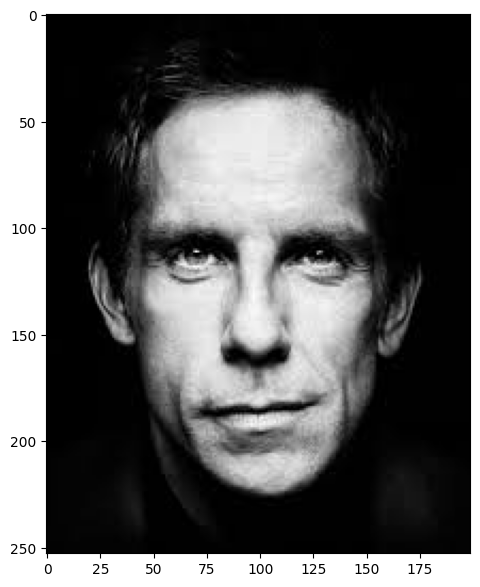

In [41]:
image = cv2.imread("bw4.jpeg")
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plot_image(image)

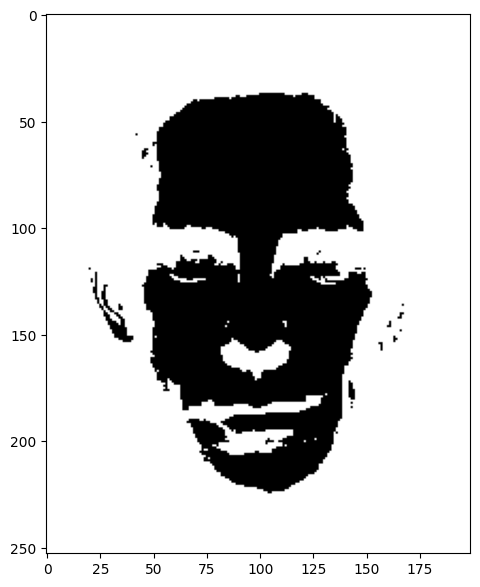

In [42]:
ret1,mod_image=cv2.threshold(image,120,255,cv2.THRESH_BINARY_INV)
plot_image(mod_image)

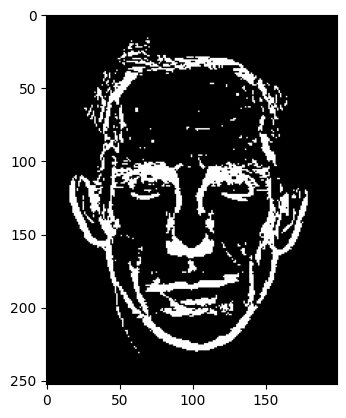

In [43]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mod_image = cv2.adaptiveThreshold(
    grayscale_image,  # Input grayscale image
    255,              # Maximum pixel value
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Adaptive thresholding method
    cv2.THRESH_BINARY_INV,           # Threshold type
    21,               # Block size (must be odd and > 1)
    10                # Constant subtracted from the mean
)
plt.imshow(mod_image, cmap='gray')

EDGE DETECTION

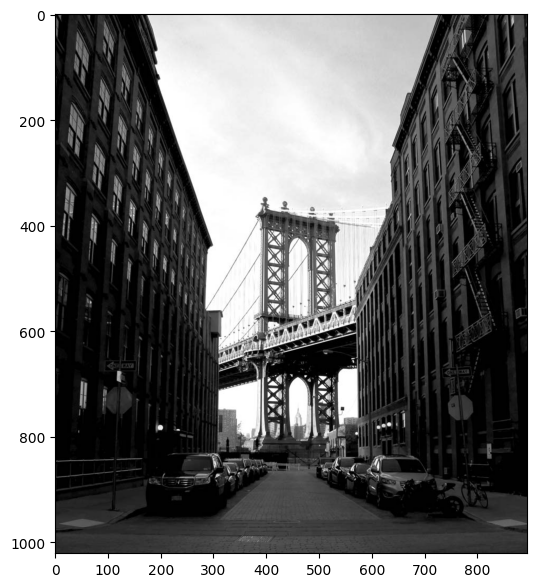

In [44]:
image = cv2.imread("ed3.jpg")
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
# image=cv2.medianBlur(image,5)
plot_image(image)

In [46]:
gradient_sobelx=cv2.Sobel(image,-1,1,0)
gradient_sobely=cv2.Sobel(image,-1,0,1)
gradient_sobelxy=cv2.addWeighted(gradient_sobelx,0.5,gradient_sobely,0.5,0)
gradient_laplacian=cv2.Laplacian(image,-1)
canny_output=cv2.Canny(image,50,150)

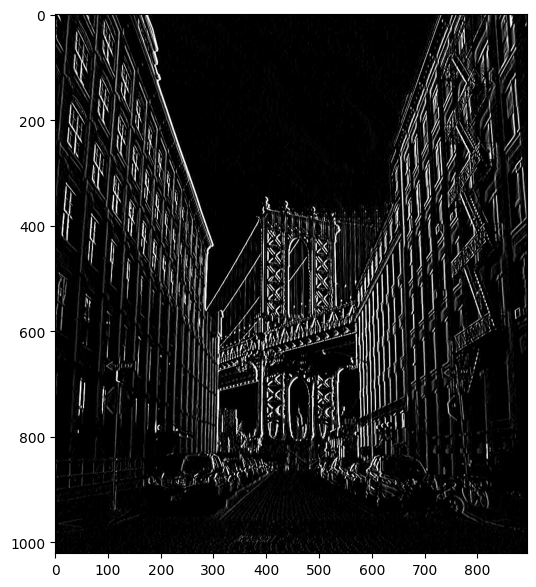

In [47]:
plot_image(gradient_sobelx)

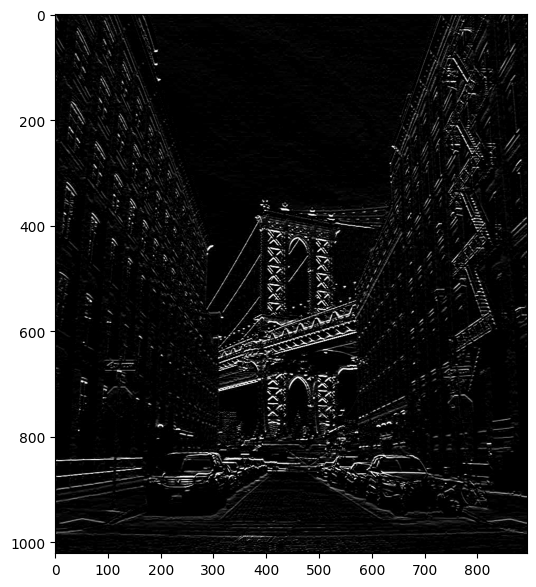

In [48]:
plot_image(gradient_sobely)

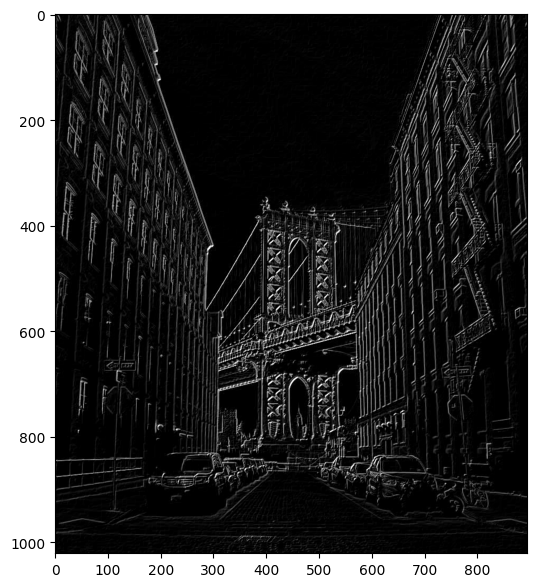

In [49]:
  plot_image(gradient_sobelxy)

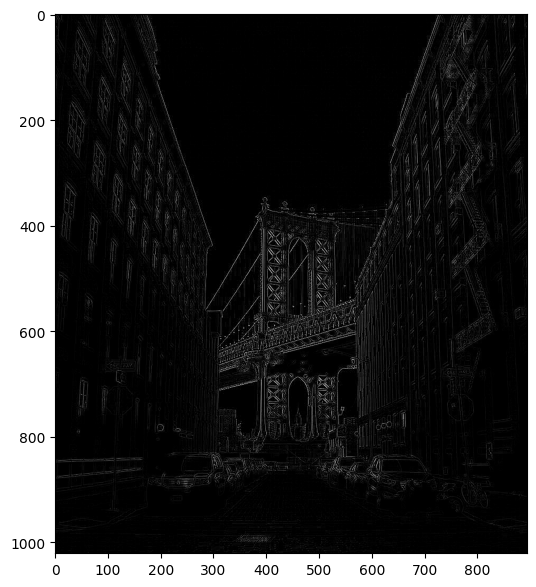

In [50]:
plot_image(gradient_laplacian)